In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

# - Data Exploration

In [3]:
df=pd.read_csv("adult_data.csv",sep=",",encoding='utf-8')
df.head(6)

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df.columns

Index(['x', 'age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
# This dataset contains 4812 samples and 28 features. 
print(df.shape)
print(len(df))
print(len(df.columns))

(48842, 16)
48842
16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   x                48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   48842 non-null  object
 15  income           48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [7]:
df.describe()

,x,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,24421.500000,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,14099.615261,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,12211.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,24421.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,36631.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,48842.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
#Finding the correlation between the features before manipulating the data
df.corr()

,x,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
x,1.000000,-0.003973,0.001435,0.001213,-0.000532,-0.001139,0.001497
age,-0.003973,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,0.001435,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.001213,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,-0.000532,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,-0.001139,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.001497,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<AxesSubplot:>

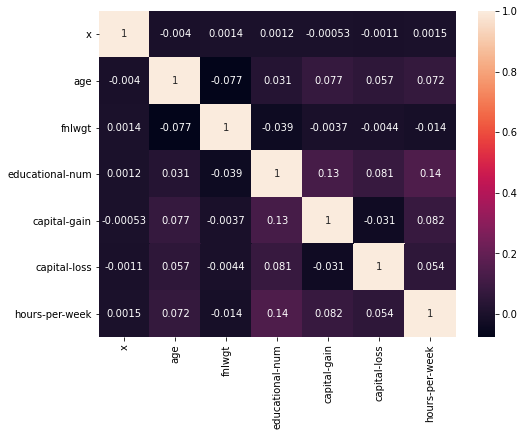

In [9]:
#Representing the correlation between the features before preprocessing the data 
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

### - Note that: 
#### The correlation between the features and each other before the preprocessing is very low.

# - Data Visualization 

In [10]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

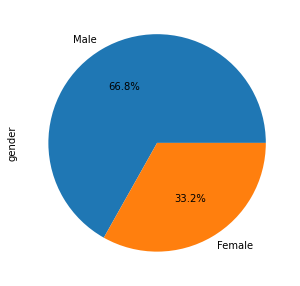

In [11]:
# The percentage of males to females in workclasses according to the dataset.
df['gender'].value_counts().plot(kind="pie", autopct="%.1f%%",figsize=(5, 5))
plt.show()

In [12]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

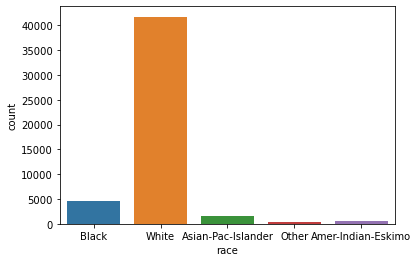

In [13]:
#Visual representation of the number of each race in workclasses according to the dataset. 
sns.countplot(x='race',data=df )

In [14]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

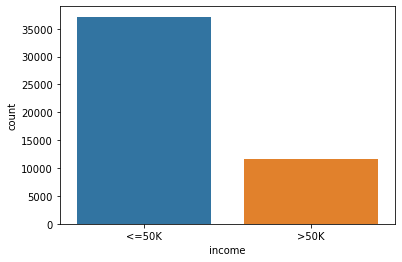

In [15]:
#The percentage of people with income less than or equal to 50k to that of greater than 50
#It shows a gap in wages.
sns.countplot(x='income',data=df )

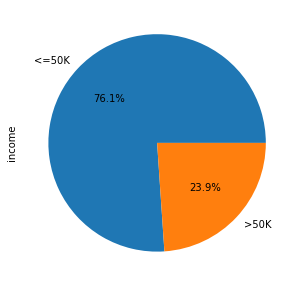

In [16]:
df['income'].value_counts().plot(kind="pie", autopct="%.1f%%",figsize=(5, 5))
plt.show()

<AxesSubplot:xlabel='income', ylabel='count'>

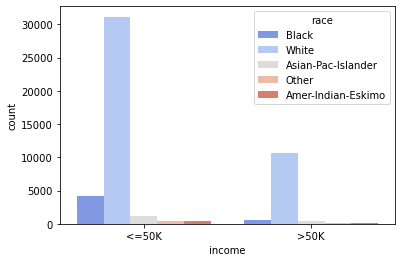

In [17]:
#Representation of the relationship between the race and the income, white people are dominant in both. 
sns.countplot(df['income'], palette='coolwarm', hue='race', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

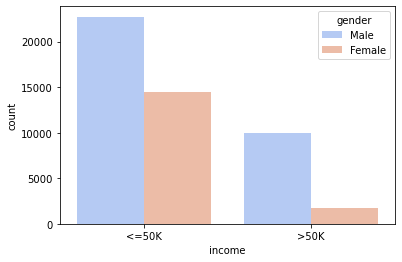

In [18]:
sns.countplot(df['income'], palette='coolwarm', hue='gender', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

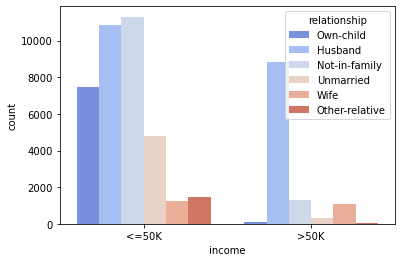

In [19]:
#Visual representation of the relationship between the marital status and the income. 
sns.countplot(df['income'], palette='coolwarm', hue='relationship', data=df)

<a id="4"></a> <br>
<font color='black' size="+2.5"><b>4 - Data Processing</b></font><br>

In this section:
- Handling missing values and duplicates.
- Discovering unique values.
- Dividing data into categorical and numerical features.
- Handling garbage values in the categorical features.
- Categorical encoding.
- Feature Engineering.
- Handling outliers.

###                                                                 - Handling Missing values

In [20]:
# - Exploring missing values in the dataset. 
df.isnull().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [21]:
df.isnull().sum().any() 

False

- "As shown above there're no missing values, despite that the data contains undesired garbage values that won't be clarified until finding the uniques of each feature."

In [22]:
df.columns

Index(['x', 'age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [23]:
#The feature x refers to the index of the worker as ordinary number so dropping the column is the best solution.
df.drop("x",axis=1,inplace=True)
df.head(6)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [24]:
len(df)-len(df.drop_duplicates())

52

In [25]:
df=df.drop_duplicates()

In [26]:
len(df.drop_duplicates())

48790

In [27]:
# To ensure the removal of duplicates.
len(df)-len(df.drop_duplicates())

0

### - Discovering unique values of the features

In [28]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [29]:
for i in df:
    print(f" {i}  :  {df[i].unique()}")
    print("\n")

 age  :  [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]


 workclass  :  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


 fnlwgt  :  [226802  89814 336951 ... 129912 255835 257302]


 education  :  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


 educational-num  :  [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


 marital-status  :  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


 occupation  :  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech


<font size="+2.5"><b> Observation </b></font><br>

- 1. There's '?' in the following columns: workclass, occupation and native-country. 

- 2. They're all categorical features so the best solution is to divide the features into numerical and categorical data and deal with this garbage value. 


### - Dividing features into numerical and categorical features to ease dealing with. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [31]:
df.rename(columns={'fnlwgt': 'finalweight'}, inplace=True)

In [32]:
categoricalfeatures=[i for i in df.columns if df.dtypes[i]=='object']
categoricalfeatures

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [33]:
df.isin(['?']).sum()

age                   0
workclass          2795
finalweight           0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [34]:
df.shape

(48790, 15)

In [35]:
# Note that: The percentage of the garbage value is approximately 12%. 

In [36]:
df= df.replace('?', np.NaN)

In [37]:
df.isna().sum()

age                   0
workclass          2795
finalweight           0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [38]:
# Dropping the null values and ensuring that the data contains only valid values.
df.dropna(inplace=True)
df.isna().sum()

age                0
workclass          0
finalweight        0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [39]:
for i in df:
    print(f" {i}  :  {df[i].unique()}")
    print("\n")

 age  :  [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]


 workclass  :  ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


 finalweight  :  [226802  89814 336951 ... 199655 255835 257302]


 education  :  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']


 educational-num  :  [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]


 marital-status  :  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


 occupation  :  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 

# - Feature Engineering 

In [40]:
# education Category
df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'School')
df.education = df.education.replace('HS-grad', 'High school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher education')
df.education = df.education.replace('Bachelors', 'Undergrad')
df.education = df.education.replace('Masters', 'Graduate')
df.education = df.education.replace('Doctorate', 'PhD Holder')

In [41]:
df['education'].unique()

array(['School', 'High school', 'Higher education', 'Undergrad',
       'Graduate', 'PhD Holder'], dtype=object)

In [42]:
df['marital-status']= df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
df['marital-status']= df['marital-status'].replace(['Never-married'], 'Not-married')
df['marital-status']= df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'Other')

In [43]:
df['marital-status'].unique()

array(['Not-married', 'Married', 'Other'], dtype=object)

In [44]:
df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

# - Encoding 

In [45]:
#Defining binary encoding algorithm
def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

In [46]:
#Applying binary encoding  
binaryfeatures=['gender', 'income']
df = binary_encode(df, binaryfeatures)
df

,age,workclass,finalweight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,7,Not-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,High school,9,Married,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Higher education,12,Married,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Higher education,10,Married,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
5,34,Private,198693,School,6,Not-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Higher education,12,Married,Tech-support,Wife,White,0,0,0,38,United-States,0
48838,40,Private,154374,High school,9,Married,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
48839,58,Private,151910,High school,9,Other,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
48840,22,Private,201490,High school,9,Not-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


# - Dealing with outliers

In [47]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<AxesSubplot:xlabel='age'>

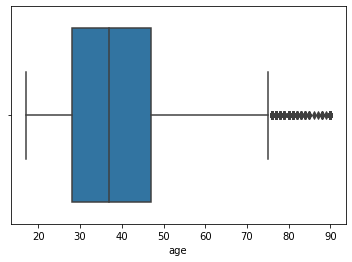

In [48]:
sns.boxplot(data=df,x="age")

In [49]:
df = df.drop(df[df['age']>77].index)

<AxesSubplot:xlabel='educational-num'>

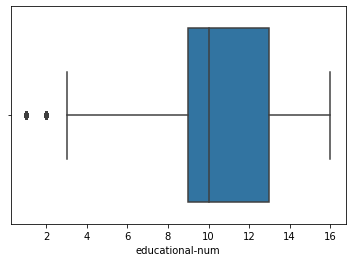

In [50]:
sns.boxplot(data=df,x="educational-num")

In [51]:
df = df.drop(df[df['educational-num']<3].index)

<AxesSubplot:xlabel='capital-gain'>

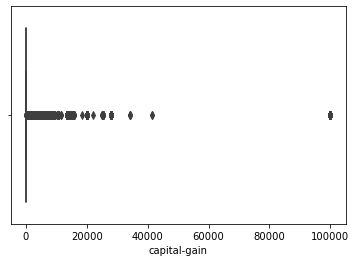

In [52]:
sns.boxplot(data=df,x="capital-gain")

In [53]:
df = df.drop(df[df['capital-gain']>17000].index)

<AxesSubplot:xlabel='capital-loss'>

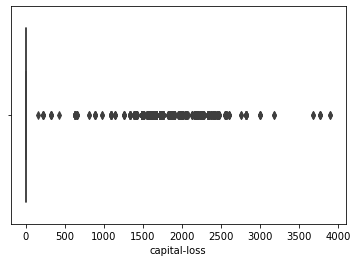

In [54]:
sns.boxplot(data=df,x="capital-loss")

<AxesSubplot:xlabel='hours-per-week'>

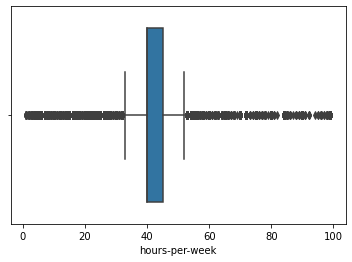

In [55]:
#hours-per-week
sns.boxplot(data=df,x="hours-per-week")

# - Modeling 

In [56]:
#Defining the column that we want to predict
x= df.drop(['income'], axis=1)
y= df['income']

In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [58]:
#Creating a copy of the df to manipulate it 
df2= df.copy()
df2= df2.apply(LabelEncoder().fit_transform)
df2.head()

,age,workclass,finalweight,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,2,17854,4,4,1,6,3,2,1,0,0,39,38,0
1,21,2,3850,1,6,0,4,0,4,1,0,0,49,38,0
2,11,1,23413,2,9,0,10,0,4,1,0,0,39,38,1
3,27,2,10307,2,7,0,6,0,2,1,96,0,39,38,1
5,17,2,15160,4,3,1,7,1,4,1,0,0,29,38,0


In [59]:
#fitting the data
sc= StandardScaler().fit(df2.drop('income', axis=1))

In [60]:
x= sc.transform(df2.drop('income', axis=1))
y= df['income']

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [62]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [63]:
#Modeling 
model = lr.fit(x_train, y_train)
pred = model.predict(x_test)

In [64]:
lr.score(x_train, y_train)

0.8338393098680453

In [65]:
#Accuracy
lr.score(x_test, y_test)

0.8254283137962128

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
model1 = rf.fit(x_train, y_train)
pred1 = model1.predict(x_test)

In [69]:
rf.score(x_train, y_train)

0.9998797679521476

In [70]:
#Accuracy after using Random forest
rf.score(x_test, y_test)

0.8481514878268711

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [72]:
confusion_matrix(y_test, pred1)

array([[7725,  625],
       [1059, 1681]], dtype=int64)

In [73]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8350
           1       0.73      0.61      0.67      2740

    accuracy                           0.85     11090
   macro avg       0.80      0.77      0.78     11090
weighted avg       0.84      0.85      0.84     11090

